In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('crimes_uci.csv')
ds

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [4]:
ds.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

In [5]:
ds.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ds_corr=ds.corr()

In [7]:
ds_corr

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
state,1.000000,-0.002857,-0.079569,-0.049505,-0.046154,0.213990,-0.318602,-0.210841,0.100622,0.036950,...,-0.356149,0.340611,0.151854,0.062087,0.127616,-0.040350,-0.137940,-0.021431,-0.075305,-0.211398
fold,-0.002857,1.000000,-0.007552,0.035488,0.003524,-0.004436,-0.001317,0.000915,-0.000151,0.007080,...,-0.000195,-0.025403,-0.021956,-0.035202,-0.027938,0.017846,-0.012570,-0.000541,-0.023780,-0.032577
population,-0.079569,-0.007552,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,...,0.172731,-0.125133,-0.123691,0.001610,-0.089638,0.713652,0.231897,0.270356,0.466352,0.367157
householdsize,-0.049505,0.035488,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,...,0.311107,-0.049253,-0.057842,-0.103109,-0.003277,-0.015078,-0.004072,-0.051506,-0.094368,-0.034923
racepctblack,-0.046154,0.003524,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,...,-0.098114,0.093494,-0.045646,0.056358,-0.002894,0.149758,0.095053,0.147023,0.260793,0.631264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LandArea,-0.040350,0.017846,0.713652,-0.015078,0.149758,-0.131389,-0.001084,0.011634,0.025736,0.062476,...,-0.048845,-0.069273,-0.116901,-0.062989,-0.104403,1.000000,-0.170856,0.007699,0.299632,0.196800
PopDens,-0.137940,-0.012570,0.231897,-0.004072,0.095053,-0.337458,0.389944,0.370103,-0.095749,0.119725,...,0.614772,-0.221341,0.020701,0.118082,-0.012166,-0.170856,1.000000,0.587804,0.228084,0.281390
PctUsePubTrans,-0.021431,-0.000541,0.270356,-0.051506,0.147023,-0.215636,0.296921,0.078366,-0.173279,-0.023507,...,0.401711,-0.175459,0.192367,0.081260,-0.042424,0.007699,0.587804,1.000000,0.206644,0.153829
LemasPctOfficDrugUn,-0.075305,-0.023780,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,...,0.170946,-0.134230,-0.090249,0.008227,-0.107289,0.299632,0.228084,0.206644,1.000000,0.348627


In [8]:
ds_corr['ViolentCrimesPerPop']

state                 -0.211398
fold                  -0.032577
population             0.367157
householdsize         -0.034923
racepctblack           0.631264
                         ...   
LandArea               0.196800
PopDens                0.281390
PctUsePubTrans         0.153829
LemasPctOfficDrugUn    0.348627
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, Length: 102, dtype: float64

In [9]:
list=np.where(ds_corr['ViolentCrimesPerPop']>=0.50)   #there are a total of 128 attributes,by considering attributes having a correlation of 0.5 or greater with are target variable, we can reduce the set of attributes to be given to the model.

In [10]:
list

(array([  4,  19,  29,  33,  39,  41,  42,  51, 101], dtype=int64),)

In [11]:
ds_corr.iloc[4]

state                 -0.046154
fold                   0.003524
population             0.231178
householdsize         -0.067109
racepctblack           1.000000
                         ...   
LandArea               0.149758
PopDens                0.095053
PctUsePubTrans         0.147023
LemasPctOfficDrugUn    0.260793
ViolentCrimesPerPop    0.631264
Name: racepctblack, Length: 102, dtype: float64

In [12]:
ds_corr.iloc[19]

state                 -0.102243
fold                  -0.043075
population             0.177172
householdsize          0.115204
racepctblack           0.444933
                         ...   
LandArea               0.030456
PopDens                0.197055
PctUsePubTrans        -0.016438
LemasPctOfficDrugUn    0.176036
ViolentCrimesPerPop    0.574665
Name: pctWPubAsst, Length: 102, dtype: float64

In [13]:
ds_corr.iloc[29]

state                  0.034205
fold                  -0.040151
population             0.162004
householdsize          0.055085
racepctblack           0.490241
                         ...   
LandArea               0.066140
PopDens                0.065009
PctUsePubTrans        -0.108993
LemasPctOfficDrugUn    0.170169
ViolentCrimesPerPop    0.521877
Name: PctPopUnderPov, Length: 102, dtype: float64

In [14]:
ds_corr.iloc[33]

state                 -0.038888
fold                  -0.034699
population             0.145247
householdsize          0.143811
racepctblack           0.388319
                         ...   
LandArea               0.045004
PopDens                0.172615
PctUsePubTrans        -0.016950
LemasPctOfficDrugUn    0.170034
ViolentCrimesPerPop    0.504235
Name: PctUnemployed, Length: 102, dtype: float64

In [15]:
ds_corr.iloc[39]

state                 -0.104680
fold                  -0.024665
population             0.232603
householdsize         -0.449461
racepctblack           0.403862
                         ...   
LandArea               0.147940
PopDens                0.091909
PctUsePubTrans        -0.078334
LemasPctOfficDrugUn    0.237638
ViolentCrimesPerPop    0.525407
Name: MalePctDivorce, Length: 102, dtype: float64

In [16]:
ds_corr.iloc[41]

state                 -0.182710
fold                  -0.017298
population             0.258529
householdsize         -0.349128
racepctblack           0.429002
                         ...   
LandArea               0.143642
PopDens                0.167487
PctUsePubTrans        -0.056479
LemasPctOfficDrugUn    0.253158
ViolentCrimesPerPop    0.556032
Name: FemalePctDiv, Length: 102, dtype: float64

In [17]:
ds_corr.iloc[42]

state                 -0.145359
fold                  -0.021101
population             0.248099
householdsize         -0.409331
racepctblack           0.432427
                         ...   
LandArea               0.144667
PopDens                0.133427
PctUsePubTrans        -0.067044
LemasPctOfficDrugUn    0.248832
ViolentCrimesPerPop    0.552777
Name: TotalPctDiv, Length: 102, dtype: float64

In [18]:
ds_corr.iloc[51]

state                 -0.115161
fold                  -0.009070
population             0.332564
householdsize          0.020711
racepctblack           0.810700
                         ...   
LandArea               0.139561
PopDens                0.322525
PctUsePubTrans         0.217844
LemasPctOfficDrugUn    0.350191
ViolentCrimesPerPop    0.737957
Name: PctIlleg, Length: 102, dtype: float64

In [19]:
ds_corr.iloc[101]

state                 -0.211398
fold                  -0.032577
population             0.367157
householdsize         -0.034923
racepctblack           0.631264
                         ...   
LandArea               0.196800
PopDens                0.281390
PctUsePubTrans         0.153829
LemasPctOfficDrugUn    0.348627
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, Length: 102, dtype: float64

In [20]:
list1=['racepctblack','pctWPubAsst','PctPopUnderPov','PctUnemployed','MalePctDivorce','FemalePctDiv','TotalPctDiv','PctIlleg','ViolentCrimesPerPop' ]
list1

['racepctblack',
 'pctWPubAsst',
 'PctPopUnderPov',
 'PctUnemployed',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'PctIlleg',
 'ViolentCrimesPerPop']

In [21]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [22]:
ds_new=select_columns(ds,list1)
ds_new

,racepctblack,pctWPubAsst,PctPopUnderPov,PctUnemployed,MalePctDivorce,FemalePctDiv,TotalPctDiv,PctIlleg,ViolentCrimesPerPop
0,0.02,0.15,0.19,0.27,0.68,0.75,0.75,0.14,0.20
1,0.12,0.29,0.24,0.27,1.00,0.91,1.00,0.24,0.67
2,0.49,0.40,0.27,0.36,0.63,0.71,0.70,0.46,0.43
3,1.00,0.20,0.10,0.33,0.34,0.49,0.44,0.33,0.12
4,0.02,0.11,0.06,0.12,0.22,0.20,0.21,0.06,0.03
...,...,...,...,...,...,...,...,...,...
1989,0.10,0.06,0.16,0.12,0.39,0.59,0.53,0.11,0.09
1990,0.46,0.37,0.32,0.24,0.42,0.56,0.48,0.42,0.45
1991,0.25,0.48,0.31,0.50,0.50,0.50,0.52,0.54,0.23
1992,0.06,0.24,0.16,0.37,0.32,0.30,0.32,0.17,0.19


In [23]:
ds_new.isnull().sum()

racepctblack           0
pctWPubAsst            0
PctPopUnderPov         0
PctUnemployed          0
MalePctDivorce         0
FemalePctDiv           0
TotalPctDiv            0
PctIlleg               0
ViolentCrimesPerPop    0
dtype: int64

since  the data as such is normalized we dont need to find the outliers and skewness and also the attributes containing missing values have been neglected during the correlation process. 

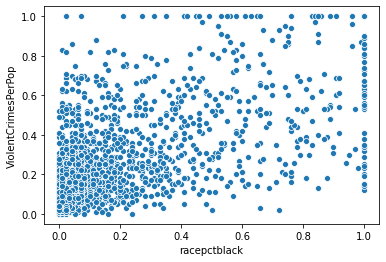

In [24]:
sns.scatterplot(x='racepctblack',y='ViolentCrimesPerPop',data=ds_new)

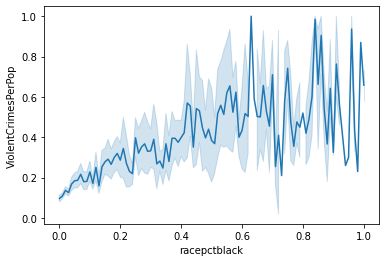

In [25]:
sns.lineplot(x='racepctblack',y='ViolentCrimesPerPop',data=ds_new)

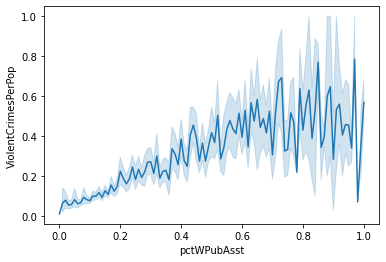

In [26]:
sns.lineplot(x='pctWPubAsst',y='ViolentCrimesPerPop',data=ds_new)

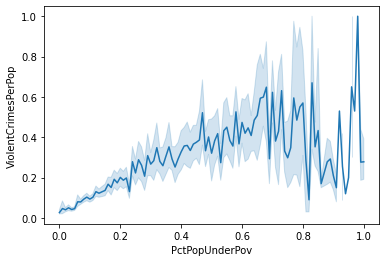

In [27]:
sns.lineplot(x='PctPopUnderPov',y='ViolentCrimesPerPop',data=ds_new)

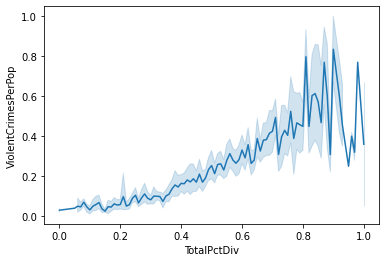

In [28]:
sns.lineplot(x='TotalPctDiv',y='ViolentCrimesPerPop',data=ds_new)

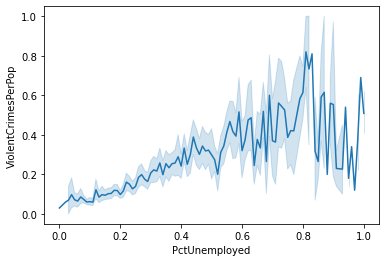

In [29]:
sns.lineplot(x='PctUnemployed',y='ViolentCrimesPerPop',data=ds_new)

Training the model

In [30]:
y=ds_new['ViolentCrimesPerPop']
y


0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [31]:
x=ds_new.drop(columns='ViolentCrimesPerPop',axis=1)
x

,racepctblack,pctWPubAsst,PctPopUnderPov,PctUnemployed,MalePctDivorce,FemalePctDiv,TotalPctDiv,PctIlleg
0,0.02,0.15,0.19,0.27,0.68,0.75,0.75,0.14
1,0.12,0.29,0.24,0.27,1.00,0.91,1.00,0.24
2,0.49,0.40,0.27,0.36,0.63,0.71,0.70,0.46
3,1.00,0.20,0.10,0.33,0.34,0.49,0.44,0.33
4,0.02,0.11,0.06,0.12,0.22,0.20,0.21,0.06
...,...,...,...,...,...,...,...,...
1989,0.10,0.06,0.16,0.12,0.39,0.59,0.53,0.11
1990,0.46,0.37,0.32,0.24,0.42,0.56,0.48,0.42
1991,0.25,0.48,0.31,0.50,0.50,0.50,0.52,0.54
1992,0.06,0.24,0.16,0.37,0.32,0.30,0.32,0.17


In [32]:
y.shape

(1994,)

In [33]:
x.shape

(1994, 8)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)

In [36]:
x_train.shape

(1335, 8)

In [37]:
x_test.shape

(659, 8)

In [38]:
y_train.shape

(1335,)

In [39]:
y_test.shape

(659,)

In [40]:
max_r_score=0
for r_state in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding",final_r_state,'is',max_r_score)

max r2 score corresponding 9 is 0.6464735862045135


In [41]:
#max r2 score we get at random state 9
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=.33)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('r2 score is:',r2_score(y_test,pred))
print('MSE is:',mean_squared_error(y_test,pred))
print('MAE is:',mean_absolute_error(y_test,pred))

r2 score is: 0.6464735862045135
MSE is: 0.019305575668859647
MAE is: 0.09955483223475184


In [42]:
print('coefficient of linear model:',lr.coef_)

print('intercept of linear model:',lr.intercept_)

coefficient of linear model: [ 0.12844671  0.09865667 -0.02541077  0.07352483  0.99231522  1.27950961
 -1.89865092  0.43386667]
intercept of linear model: -0.08443786771239947


In [43]:
#saving the model
import joblib
#saving model as a pickel file
joblib.dump(lr,'crimereport.pkl')

['crimereport.pkl']